In [1]:
import numpy as np
import pandas as pd
import pickle as pk
from matplotlib import pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
%matplotlib inline
mpl.rc('font',size=21,**{'family':'sans-serif','sans-serif':['Arial']})

In [2]:
wd = '/Volumes/eSSD0/Papers/GRL_G1RF/'
x4 = pk.load(open(wd+'data/EB/piClim-abrupt-4xCO2_EB_gam.pi','rb'))
sol = pk.load(open(wd+'data/EB/piClim-abrupt-SOLr_EB_gam.pi','rb'))
G1 = pk.load(open(wd+'data/EB/piClim-G1_EB_gam.pi','rb'))

G1l = {}
resid = {}
for var in G1:
    G1l[var] = x4[var]+sol[var]
    resid[var] = G1[var]-G1l[var]


data = {}
data['x4'] = x4
data['sol'] = sol
data['G1'] = G1
resid['r'] = resid
irf = {}
net = {}

for keys in data.keys():
    irf[keys] = data[keys].pop('IRF')
    data[keys].pop('cld_sw')
    data[keys].pop('cld_lw')
    net[keys] = np.sum(list(data[keys].values()))

adj_list = list(data['x4'].keys())

In [3]:
for i in range(0,10):
    print(adj_list[i])
    print(G1[adj_list[i]]-G1l[adj_list[i]])

salb
0.020000000000000004
ta_strato
0.010000000000000009
lapse
0.12000000000000002
Planck
0.020000000000000018
q_strato
-0.01
q_tropo
0.060000000000000005
cld_sw_lo
0.22999999999999998
cld_sw_hi
0.010000000000000009
cld_lw_lo
-0.01999999999999999
cld_lw_hi
0.029999999999999985


In [4]:
irf

{'x4': 5.47, 'sol': -7.76, 'G1': -2.47}

In [5]:
net['x4']-net['sol']

0.6000000000000001

In [7]:
net

{'x4': 1.7400000000000002, 'sol': 1.1400000000000001, 'G1': 3.35}

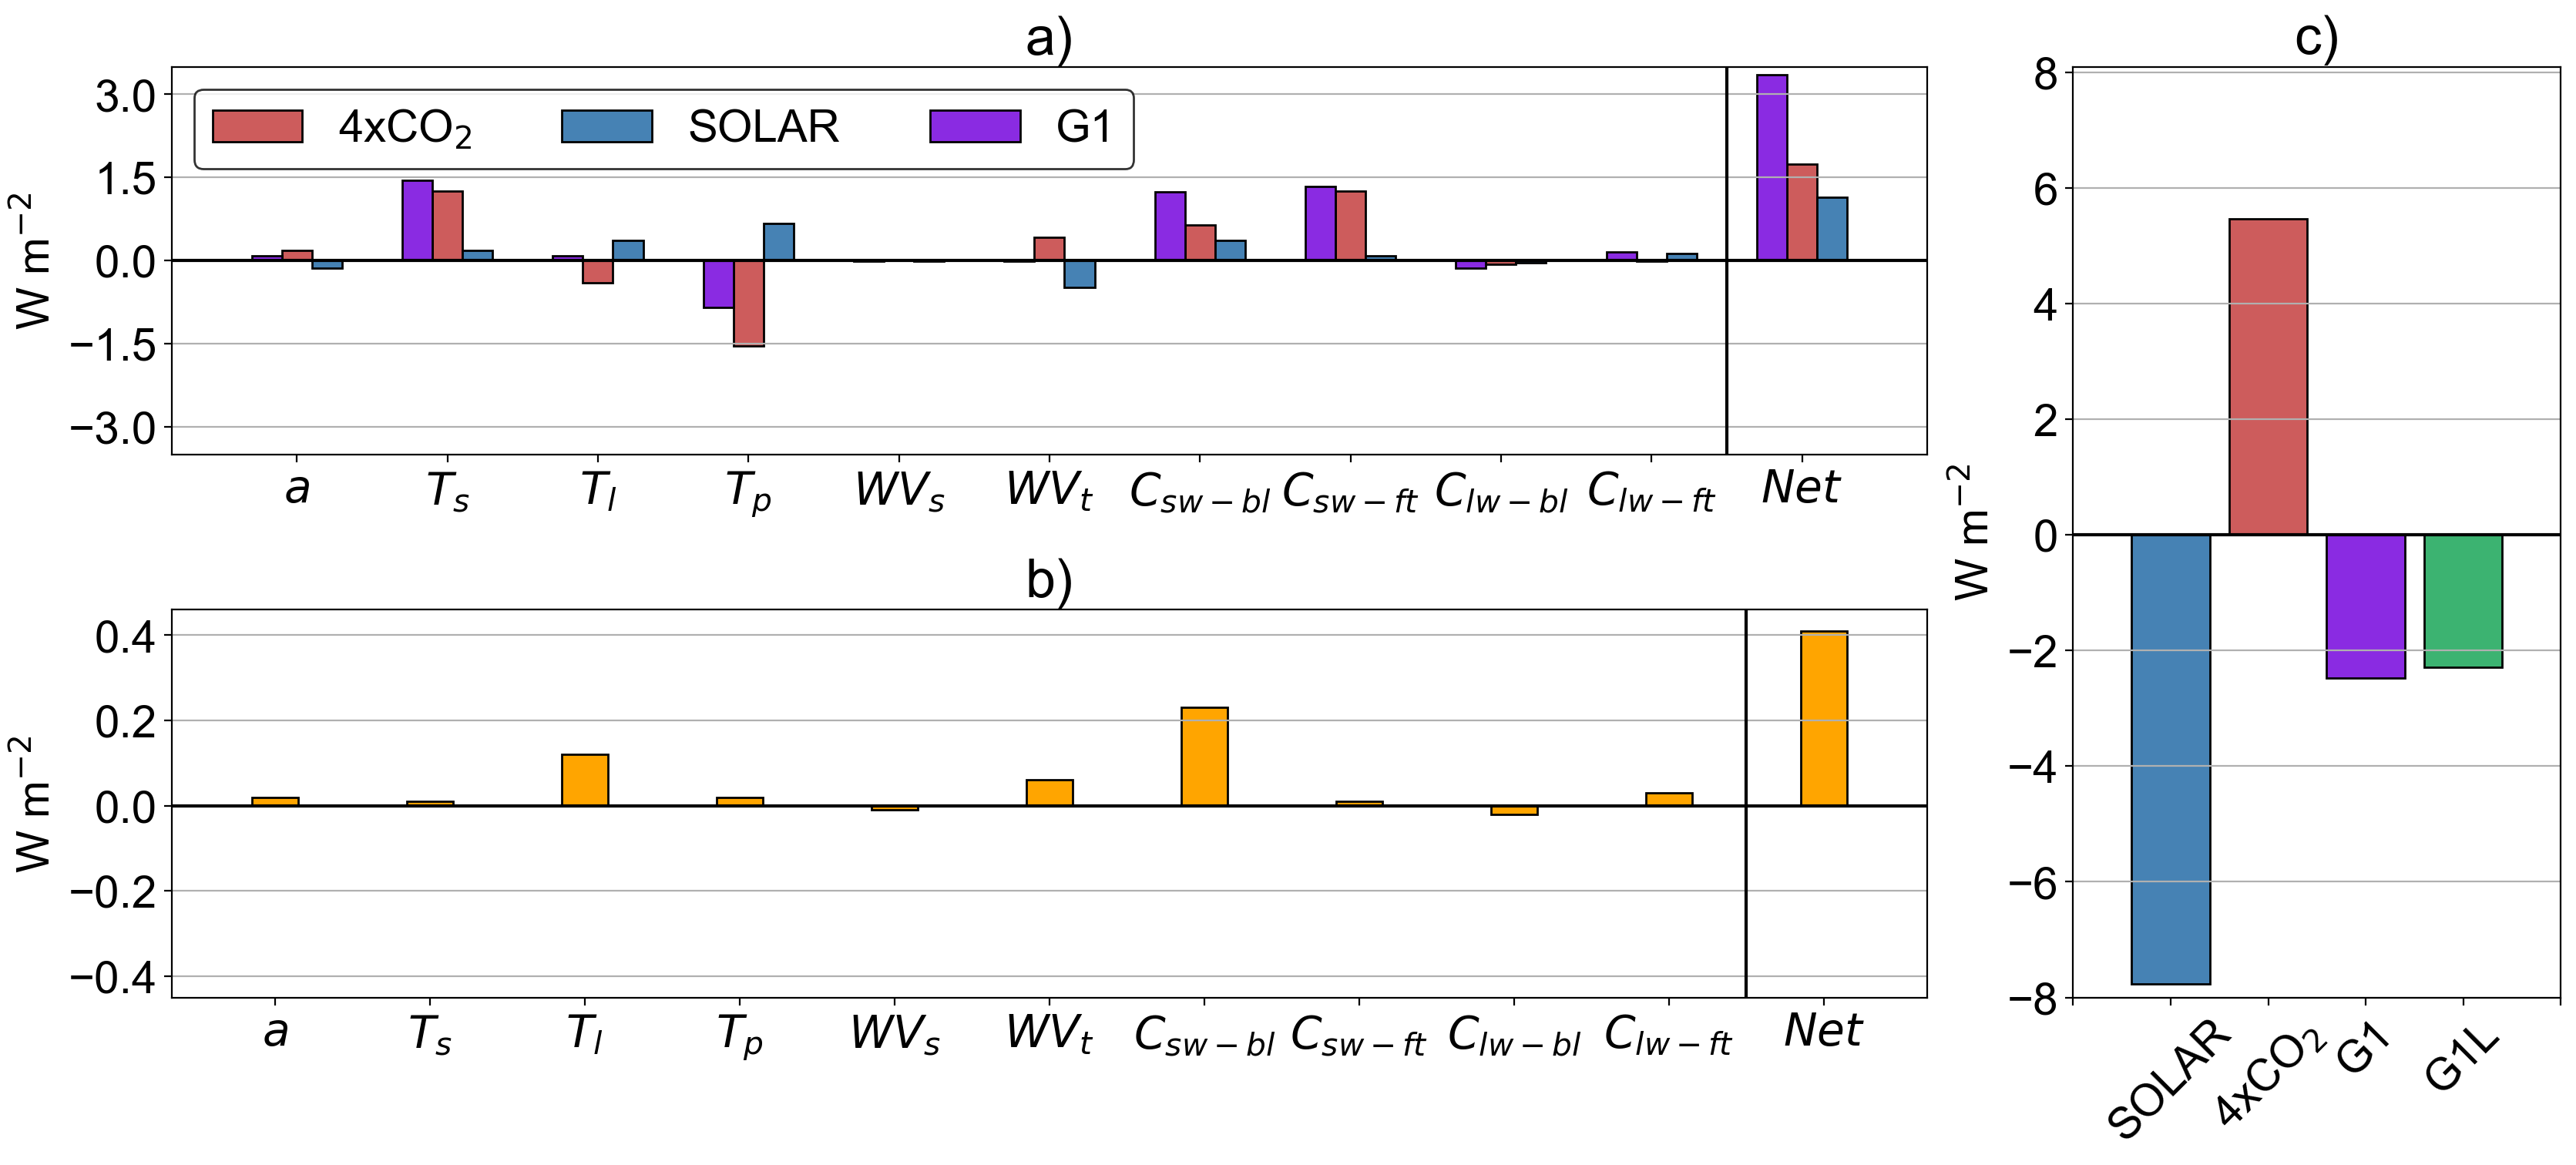

In [8]:
plt.figure(figsize=(20,8),dpi=200)

plt.subplot2grid((2, 4), (0, 0), colspan=3)
plt.title('a)')
plt.grid(axis='y')
for i in range(0,10):
    plt.bar(i,x4[adj_list[i]],edgecolor='k',width=0.2,align='center',color='indianred')
    plt.bar(i+0.2,sol[adj_list[i]],edgecolor='k',width=0.2,align='center',color='steelblue')
    plt.bar(i-0.2,G1[adj_list[i]],edgecolor='k',width=0.2,align='center',color='blueviolet')

plt.bar(10,net['x4'],edgecolor='k',width=0.2,align='center',color='indianred')
plt.bar(10+0.2,net['sol'],edgecolor='k',width=0.2,align='center',color='steelblue')
plt.bar(10-0.2,net['G1'],edgecolor='k',width=0.2,align='center',color='blueviolet')

plt.bar(1,0,edgecolor='k',color='indianred',label='4xCO$_{2}$')
plt.bar(1,0,edgecolor='k',color='steelblue',label='SOLAR')
plt.bar(1,0,edgecolor='k',color='blueviolet',label='G1')

plt.axvline(9.5,color='k')
plt.axhline(0,color='k')

leg = plt.legend(ncol=3)
leg.get_frame().set_edgecolor('k')


plt.xticks(np.arange(0,11),labels=['$a$','$T_{s}$','$T_{l}$','$T_{p}$','$WV_{s}$','$WV_{t}$','$C_{sw-bl}$','$C_{sw-ft}$','$C_{lw-bl}$','$C_{lw-ft}$','$Net$'])
plt.ylim(-3.5,3.5)
plt.yticks(np.arange(-3,3.01,1.5))
plt.ylabel('W m$^{-2}$')

plt.subplot2grid((2, 4), (1, 0), colspan=3)
plt.title('b)')
plt.grid(axis='y')
for i in range(0,10):
    plt.bar(i,G1[adj_list[i]]-G1l[adj_list[i]],edgecolor='k',width=0.3,align='center',color='orange')

plt.bar(10,np.sum(list(G1.values()))-np.sum(list(G1l.values())),edgecolor='k',width=0.3,align='center',color='orange')

plt.axvline(9.5,color='k')
plt.axhline(0,color='k')

plt.xticks(np.arange(0,11),labels=['$a$','$T_{s}$','$T_{l}$','$T_{p}$','$WV_{s}$','$WV_{t}$','$C_{sw-bl}$','$C_{sw-ft}$','$C_{lw-bl}$','$C_{lw-ft}$','$Net$'])
plt.ylim(-0.45,0.46)
plt.yticks(np.arange(-0.4,0.41,0.2))
plt.ylabel('W m$^{-2}$')

plt.subplot2grid((2, 4), (0, 3), rowspan=2)
plt.title('c)')
plt.bar(1,irf['sol'],edgecolor='k',color='steelblue')
plt.bar(2,irf['x4'],edgecolor='k',color='indianred')
plt.bar(3,irf['G1'],edgecolor='k',color='blueviolet')
plt.bar(4,irf['x4']+irf['sol'],edgecolor='k',color='mediumseagreen')
plt.axhline(0,color='k',linestyle='-')
plt.ylim(-8,8.1)
plt.grid(axis='y')
plt.yticks(np.arange(-8,8.1,2))
plt.xticks(np.arange(0,6),labels=['','SOLAR','4xCO$_{2}$','G1','G1L',''],rotation=45)
plt.ylabel('W m$^{-2}$')

plt.subplots_adjust(wspace=0.3,hspace=0.4)
plt.savefig('ADJ_Bar.png',bbox_inches='tight')